<a href="https://colab.research.google.com/github/AbeHandler/AbeHandler.github.io/blob/master/Chloropleth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# I had trouble installing these locally so running on collab
# https://bookdown.org/alhdzsz/data_viz_ir/maps.html
# see also the eda folder in the Berin Github repo
install.packages("sf")
install.packages("rnaturalearth")
install.packages("tidyverse")

library(sf)
library(rnaturalearth)
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshaping’, ‘ragg’


Warning message in install.packages("tidyverse"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘tidyverse’ had non-zero exit status”


### Steps

- First initialize the world.csv file

- Then build the worldplus file in the `eda` folder and upload it here


In [172]:
library(ggplot2)
world <- ne_countries(scale = "small", returnclass = "sf")
write_csv(world, "world.csv")
worldplus <- read_csv("worldplus.csv")
world = left_join(world, worldplus, by="admin")

Rows: 531 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): era, admin
dbl (1): fraction

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in sf_column %in% names(g):
“Each row in `x` is expected to match at most 1 row in `y`.
ℹ Row 1 of `x` matches multiple rows.
ℹ If multiple matches are expected, set `multiple = "all"` to silence this
  warning.”


Saving 6.67 x 6.67 in image


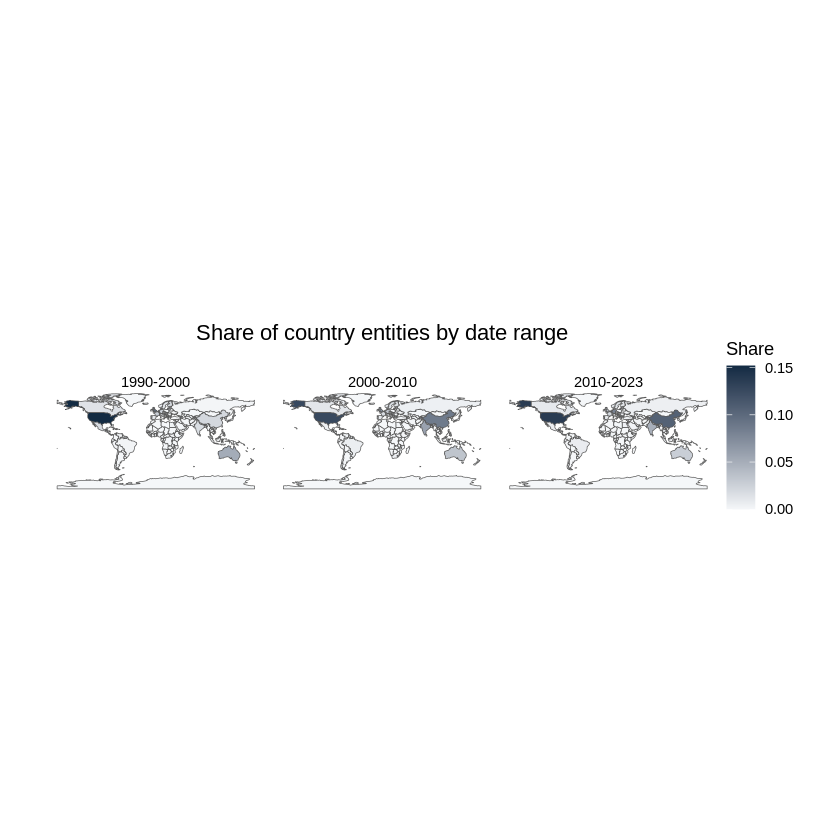

In [213]:
world %>% 
  ggplot() + 
  geom_sf(aes(fill = fraction)) +
  theme_void() + scale_fill_gradient(name = "Share", low = "#f5f7f9", high = "#132B43") + facet_grid(cols = vars(era)) + 
  ggtitle("Share of country entities by date range") + theme(plot.title = element_text(hjust = 0.5)) + 
    theme(plot.margin=grid::unit(c(1, 1, 1, 1), "cm"), 
          legend.position="right",
          legend.margin = margin(t = - 20),
          plot.title = element_text(vjust = + 7)) 
ggsave("geo.pdf")